# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy
import scipy.stats as stats
import pandas as pd

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import nodeMapping as nm
import normalize as norm

# Set Directory Paths

In [3]:
# Directory path to load preconstructed Atlas Data
%store -r baseDir

# Directory path to load formatted Pathology Data
%store -r path_dataDir
# Directory path to save Calcualted Analysis Data - Pathology
%store -r path_CalData

# Directory path to load formatted Thickness At Path Data
%store -r thickAtPath_dataDir
# Directory path to save Calcualted Analysis Data
%store -r thickAtPath_CalData
# Directory path to save Figures
%store -r thickAtPath_Fig

# Loading

## Loading the preconstructed atlas data

In [4]:
# loads the preconstructed Atlas data
NetworkDataGeneral = scipy.io.loadmat(os.path.join(baseDir, 'NetworkAnalysisGeneral', 'FTDGeneralData_20221114.mat'))

## Loading Normalized Volume At Path W Score (TAU, TDP) - Dropped

In [5]:
# TAUnormVolAtPath_w_Drop
with open(os.path.join(thickAtPath_CalData, 'TAUnormVolAtPath_w_Drop.pkl'), 'rb') as f:
    TAUnormVolAtPath_w_Drop = pickle.load(f)
f.close()

# TDPnormVolAtPath_w_Drop
with open(os.path.join(thickAtPath_CalData, 'TDPnormVolAtPath_w_Drop.pkl'), 'rb') as f:
    TDPnormVolAtPath_w_Drop = pickle.load(f)
f.close()

## Loading Dropped Index (=few observations)

In [6]:
# TAU_missing_index
with open(os.path.join(path_CalData, 'TAU_missing_index.pkl'), 'rb') as f:
    TAU_missing_index = pickle.load(f)
f.close()

# TDP_missing_index
with open(os.path.join(path_CalData, 'TDP_missing_index.pkl'), 'rb') as f:
    TDP_missing_index = pickle.load(f)
f.close()

## Loading Pathology Labels (TAU, TDP) - Dropped

In [7]:
# pathNames_TAU_Drop
with open(os.path.join(path_CalData, 'pathNames_TAU_Drop.pkl'), 'rb') as f:
    pathNames_TAU_Drop = pickle.load(f)
f.close()

# pathNames_TDP_Drop
with open(os.path.join(path_CalData, 'pathNames_TDP_Drop.pkl'), 'rb') as f:
    pathNames_TDP_Drop = pickle.load(f)
f.close()

## Loading pathCoM (TAU, TDP) - Dropped

In [8]:
# CoM_TAU_Drop
with open(os.path.join(path_dataDir, 'CoM_TAU_Drop.pkl'), 'rb') as f:
    CoM_TAU_Drop = pickle.load(f)
f.close()

# CoM_TDP_Drop
with open(os.path.join(path_dataDir, 'CoM_TDP_Drop.pkl'), 'rb') as f:
    CoM_TDP_Drop = pickle.load(f)
f.close()

# T-test between TAU vs TDP

## Checking if there is region differences between TAU and TDP due to Drop in Observations

In [9]:
print(TAU_missing_index)
print(TDP_missing_index)

# --> There is no difference

[ 7  8 17 19 27 28 37 39]
[ 7  8 17 19 27 28 37 39]


In [10]:
# Number of regions of Pathology (N = 40)
N = TAUnormVolAtPath_w_Drop.shape[1]

In [11]:
TAUnormVolAtPath_w_Drop.shape

(26, 32)

In [12]:
TDPnormVolAtPath_w_Drop.shape

(30, 32)

## T-test. Since the sample numbers are different between TAU and TDP, we would perform Welch's t-test

In [13]:
TAU_gt_TDP_Ttest_stat_list = []
TAU_gt_TDP_Ttest_pval_list = []

TDP_gt_TAU_Ttest_stat_list = []
TDP_gt_TAU_Ttest_pval_list = []


for i in range(N):
    TAU_data = TAUnormVolAtPath_w_Drop[:, i]
    TDP_data = TDPnormVolAtPath_w_Drop[:, i]

    # ignore NaN Values in T-test
    TAU_gt_TDP_Ttest = stats.ttest_ind(a=TAU_data, b=TDP_data, equal_var=False, alternative='greater', nan_policy='omit')
    TDP_gt_TAU_Ttest = stats.ttest_ind(a=TAU_data, b=TDP_data, equal_var=False, alternative='less', nan_policy='omit')

    TAU_gt_TDP_Ttest_stat = TAU_gt_TDP_Ttest[0]
    TAU_gt_TDP_Ttest_pval = TAU_gt_TDP_Ttest[1]

    TAU_gt_TDP_Ttest_stat_list.append(TAU_gt_TDP_Ttest_stat)
    TAU_gt_TDP_Ttest_pval_list.append(TAU_gt_TDP_Ttest_pval)

    TDP_gt_TAU_Ttest_stat = TDP_gt_TAU_Ttest[0]
    TDP_gt_TAU_Ttest_pval = TDP_gt_TAU_Ttest[1]

    TDP_gt_TAU_Ttest_stat_list.append(TDP_gt_TAU_Ttest_stat)
    TDP_gt_TAU_Ttest_pval_list.append(TDP_gt_TAU_Ttest_pval)
    

## TAU > TDP

In [14]:
# Pandas DataFrame
TAU_gt_TDP_df = pd.DataFrame(np.concatenate((np.array(TAU_gt_TDP_Ttest_pval_list).reshape((-1, 1)), np.array(TAU_gt_TDP_Ttest_stat_list).reshape((-1, 1))), axis=1), 
                             columns=['pval', 'stat'], index=pathNames_TAU_Drop)

In [15]:
TAU_gt_TDP_df

,pval,stat
ANG_L,0.762424,-0.719185
ATC_L,0.998269,-3.089514
HIP_L,0.985358,-2.249110
IFC_L,0.840478,-1.006797
M1_L,0.816818,-0.911376
MFC_L,0.912123,-1.375613
OFC_L,0.908039,-1.351343
SMTC_L,0.677362,-0.463223
SPC_L,0.588817,-0.225606
V1_L,0.123135,1.172938


## TDP > TAU

In [16]:
# Pandas DataFrame
TDP_gt_TAU_df = pd.DataFrame(np.concatenate((np.array(TDP_gt_TAU_Ttest_pval_list).reshape((-1, 1)), np.array(TDP_gt_TAU_Ttest_stat_list).reshape((-1, 1))), axis=1), 
                             columns=['pval', 'stat'], index=pathNames_TDP_Drop)

In [17]:
TDP_gt_TAU_df

,pval,stat
ANG_L,0.237576,-0.719185
ATC_L,0.001731,-3.089514
HIP_L,0.014642,-2.249110
IFC_L,0.159522,-1.006797
M1_L,0.183182,-0.911376
MFC_L,0.087877,-1.375613
OFC_L,0.091961,-1.351343
SMTC_L,0.322638,-0.463223
SPC_L,0.411183,-0.225606
V1_L,0.876865,1.172938


## Normalize the values between TAU and TDP

In [18]:
# Max, Min value of TAU
print(np.nanmax(TAUnormVolAtPath_w_Drop))
print(np.nanmin(TAUnormVolAtPath_w_Drop))

3.718168082858568
-8.198148996175894


In [19]:
# Max, Min value of TDP
print(np.nanmax(TDPnormVolAtPath_w_Drop))
print(np.nanmin(TDPnormVolAtPath_w_Drop))

4.318658496126783
-7.46618208604802


In [20]:
# Min/Max Range of Normalizing
tmin = -1
tmax = 1

In [21]:
# normalizing TAU EXCLUDING NaN!
TAUnormVolAtPath_w_Drop_Norm = np.zeros((TAUnormVolAtPath_w_Drop.shape))

for i in range(TAUnormVolAtPath_w_Drop.shape[1]):
    TAUnormVolAtPath_w_Drop_Norm[:,i] = norm.normalize(TAUnormVolAtPath_w_Drop[:, i], tmin, tmax)

In [22]:
# normalizing TDP EXCLUDING NaN!
TDPnormVolAtPath_w_Drop_Norm = np.zeros((TDPnormVolAtPath_w_Drop.shape))

for i in range(TDPnormVolAtPath_w_Drop.shape[1]):
    TDPnormVolAtPath_w_Drop_Norm[:,i] = norm.normalize(TDPnormVolAtPath_w_Drop[:, i], tmin, tmax)

## T-test. Since the sample numbers are different between TAU and TDP, we would perform Welch's t-test

In [23]:
TAU_gt_TDP_Ttest_stat_list_Norm = []
TAU_gt_TDP_Ttest_pval_list_Norm = []

TDP_gt_TAU_Ttest_stat_list_Norm = []
TDP_gt_TAU_Ttest_pval_list_Norm = []


for i in range(N):
    TAU_data = TAUnormVolAtPath_w_Drop_Norm[:, i]
    TDP_data = TDPnormVolAtPath_w_Drop_Norm[:, i]

    # ignore NaN Values in T-test
    TAU_gt_TDP_Ttest = stats.ttest_ind(a=TAU_data, b=TDP_data, equal_var=False, alternative='greater', nan_policy='omit')
    TDP_gt_TAU_Ttest = stats.ttest_ind(a=TAU_data, b=TDP_data, equal_var=False, alternative='less', nan_policy='omit')

    TAU_gt_TDP_Ttest_stat = TAU_gt_TDP_Ttest[0]
    TAU_gt_TDP_Ttest_pval = TAU_gt_TDP_Ttest[1]

    TAU_gt_TDP_Ttest_stat_list_Norm.append(TAU_gt_TDP_Ttest_stat)
    TAU_gt_TDP_Ttest_pval_list_Norm.append(TAU_gt_TDP_Ttest_pval)

    TDP_gt_TAU_Ttest_stat = TDP_gt_TAU_Ttest[0]
    TDP_gt_TAU_Ttest_pval = TDP_gt_TAU_Ttest[1]

    TDP_gt_TAU_Ttest_stat_list_Norm.append(TDP_gt_TAU_Ttest_stat)
    TDP_gt_TAU_Ttest_pval_list_Norm.append(TDP_gt_TAU_Ttest_pval)
    

## TAU > TDP

In [24]:
# Pandas DataFrame
TAU_gt_TDP_Norm_df = pd.DataFrame(np.concatenate((np.array(TAU_gt_TDP_Ttest_pval_list_Norm).reshape((-1, 1)), np.array(TAU_gt_TDP_Ttest_stat_list_Norm).reshape((-1, 1))), 
                                                 axis=1), columns=['pval', 'stat'], index=pathNames_TAU_Drop)

In [25]:
TAU_gt_TDP_Norm_df

,pval,stat
ANG_L,0.039146,1.794961
ATC_L,0.917858,-1.413320
HIP_L,0.867751,-1.127639
IFC_L,0.215649,0.793773
M1_L,0.052387,1.650017
MFC_L,0.656457,-0.405097
OFC_L,0.705445,-0.543901
SMTC_L,0.644148,-0.371546
SPC_L,0.001808,3.053726
V1_L,0.026545,1.977596


## TDP > TAU

In [26]:
# Pandas DataFrame
TDP_gt_TAU_Norm_df = pd.DataFrame(np.concatenate((np.array(TDP_gt_TAU_Ttest_pval_list_Norm).reshape((-1, 1)), np.array(TDP_gt_TAU_Ttest_stat_list_Norm).reshape((-1, 1))), 
                                                 axis=1), columns=['pval', 'stat'], index=pathNames_TDP_Drop)

In [27]:
TDP_gt_TAU_Norm_df

,pval,stat
ANG_L,0.960854,1.794961
ATC_L,0.082142,-1.413320
HIP_L,0.132249,-1.127639
IFC_L,0.784351,0.793773
M1_L,0.947613,1.650017
MFC_L,0.343543,-0.405097
OFC_L,0.294555,-0.543901
SMTC_L,0.355852,-0.371546
SPC_L,0.998192,3.053726
V1_L,0.973455,1.977596


# Save T-test results as csv

In [28]:
# Original
TAU_gt_TDP_df.to_csv(thickAtPath_Fig + '/TAU_gt_TDP_Ttest(NormVol_WScore).csv', index=True)

TDP_gt_TAU_df.to_csv(thickAtPath_Fig + '/TDP_gt_TAU_Ttest(NormVol_WScore).csv', index=True)

# Normalized
TAU_gt_TDP_Norm_df.to_csv(thickAtPath_Fig + '/TAU_gt_TDP_Ttest(NormVol_WScore)(Normalized).csv', index=True)

TDP_gt_TAU_Norm_df.to_csv(thickAtPath_Fig + '/TDP_gt_TAU_Ttest(NormVol_WScore(Normalized).csv', index=True)

# 3D Nodes Mapping of Log %AO

### Define Vectors for Node Size and Node Color

In [29]:
# FOR NODE SIZE 
TAUnormVolAtPath_w_exp = TAUnormVolAtPath_w_Drop
TDPnormVolAtPath_w_exp = TDPnormVolAtPath_w_Drop

# Get the MAX/MIN Thickness values
minNormVolAtPath_TAU = np.nanmin(np.nanmean(TAUnormVolAtPath_w_exp, axis=0))
minNormVolAtPath_TDP = np.nanmin(np.nanmean(TDPnormVolAtPath_w_exp, axis=0))

vanishing_val = 0.2
maxNormVolAtPath_TAU = np.nanmax(np.nanmean(TAUnormVolAtPath_w_exp, axis=0) - minNormVolAtPath_TAU) + vanishing_val
maxNormVolAtPath_TDP = np.nanmax(np.nanmean(TDPnormVolAtPath_w_exp, axis=0) - minNormVolAtPath_TDP) + vanishing_val

# Get Nodesize / normalized using mean values!
markerVecTAU = np.nanmean(TAUnormVolAtPath_w_exp, axis=0)
markerVecTAU = 3 * (1 - ((markerVecTAU - minNormVolAtPath_TAU) / maxNormVolAtPath_TAU))

markerVecTDP = np.nanmean(TDPnormVolAtPath_w_exp, axis=0)
markerVecTDP = 3 * (1 - ((markerVecTDP - minNormVolAtPath_TDP) / maxNormVolAtPath_TDP))

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(TAUnormVolAtPath_w_Drop.shape[1])
colorVecTDP = np.ones(TDPnormVolAtPath_w_Drop.shape[1])

## TAU

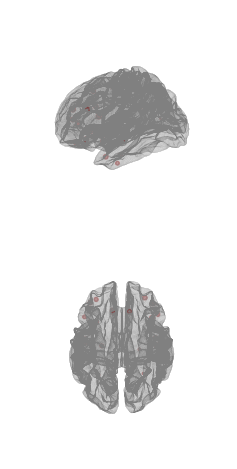

In [30]:
nm.nodeMapping(NetworkDataGeneral, CoM_TAU_Drop, pathNames_TAU_Drop, markerVecTAU, colorVecTAU, thickAtPath_Fig, 'Node_3D_Mapping_TAU',
                 nodeTransparency = 0.3, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

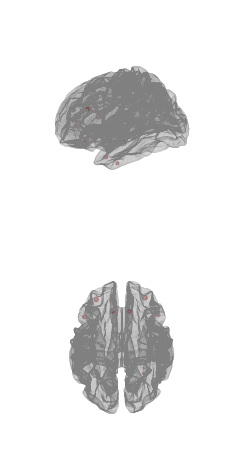

In [31]:
nm.nodeMapping(NetworkDataGeneral, CoM_TDP_Drop, pathNames_TDP_Drop, markerVecTDP, colorVecTDP, thickAtPath_Fig, 'Node_3D_Mapping_TDP',
                 nodeTransparency = 0.3, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

# Normalized Values

In [32]:
# FOR NODE SIZE 
TAUnormVolAtPath_w_exp = TAUnormVolAtPath_w_Drop_Norm
TDPnormVolAtPath_w_exp = TDPnormVolAtPath_w_Drop_Norm

# Get the MAX/MIN Thickness values
minNormVolAtPath_TAU = np.nanmin(np.nanmean(TAUnormVolAtPath_w_exp, axis=0))
minNormVolAtPath_TDP = np.nanmin(np.nanmean(TDPnormVolAtPath_w_exp, axis=0))

vanishing_val = 0.2
maxNormVolAtPath_TAU = np.nanmax(np.nanmean(TAUnormVolAtPath_w_exp, axis=0) - minNormVolAtPath_TAU) + vanishing_val
maxNormVolAtPath_TDP = np.nanmax(np.nanmean(TDPnormVolAtPath_w_exp, axis=0) - minNormVolAtPath_TDP) + vanishing_val

# Get Nodesize / normalized using mean values!
markerVecTAU = np.nanmean(TAUnormVolAtPath_w_exp, axis=0)
markerVecTAU = 3 * (1 - ((markerVecTAU - minNormVolAtPath_TAU) / maxNormVolAtPath_TAU))

markerVecTDP = np.nanmean(TDPnormVolAtPath_w_exp, axis=0)
markerVecTDP = 3 * (1 - ((markerVecTDP - minNormVolAtPath_TDP) / maxNormVolAtPath_TDP))

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(TAUnormVolAtPath_w_Drop.shape[1])
colorVecTDP = np.ones(TDPnormVolAtPath_w_Drop.shape[1])

## TAU

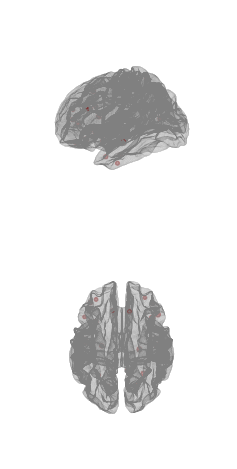

In [33]:
nm.nodeMapping(NetworkDataGeneral, CoM_TAU_Drop, pathNames_TAU_Drop, markerVecTAU, colorVecTAU, thickAtPath_Fig, 'Node_3D_Mapping_TAU(Normalized)',
                 nodeTransparency = 0.3, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## TDP

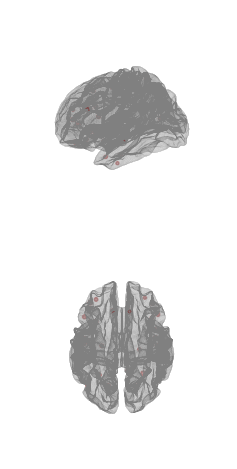

In [34]:
nm.nodeMapping(NetworkDataGeneral, CoM_TDP_Drop, pathNames_TDP_Drop, markerVecTDP, colorVecTDP, thickAtPath_Fig, 'Node_3D_Mapping_TDP(Normalized)',
                 nodeTransparency = 0.3, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)